* NAME: RISHABH PATIL
* SAP: 60009200056
* BATCH: K2

In [1]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Contrast streching

In [4]:
lcimg = cv2.imread('/content/a-low-contrast-image-b-after-enhancement_Q320.jpg',0)

In [5]:
import numpy as np
nstreched = np.zeros(lcimg.shape)
h1,w1 = nstreched.shape

In [6]:
rmax=lcimg.max()
rmin=lcimg.min()
#assuming smin =0 and smax=255
c=255/(rmax-rmin)
m, n = lcimg.shape

In [14]:
lcimg.shape

(256, 256)

In [15]:
nop=256*256

In [36]:
def hist_plot(img):
     
    # empty list to store the count
    # of each intensity value
    count =[]
    cdf=[]
     
    # empty list to store intensity
    # value
    r = []
     
    # loop to traverse each intensity
    # value
    for k in range(0, 256):
        r.append(k)
        count1 = 0
         
        # loops to traverse each pixel in
        # the image
        for i in range(m):
            for j in range(n):
                if int(img[i, j])== k:
                    count1+= 1
        count.append(count1)
        cdf.append(count1/nop)

      
         
    return (r, count, cdf)

In [37]:
import pandas as pd


In [39]:
r1, count1, pdf = hist_plot(lcimg)

In [44]:
df = pd.DataFrame({'n': r1,
                   'nk': count1,
                   'pdf': pdf})

# #view DataFrame
# df['team_cum_count'] = df.groupby('').cumcount()
df['cdf'] = 100*(df.pdf.cumsum() / df.pdf.sum())
df['(l-1)*cdf']=(df['cdf']*255)/100
print(df.iloc[[155]])

       n   nk       pdf        cdf  (l-1)*cdf
155  155  693  0.010574  78.155518  199.29657


In [41]:
for i in range(h1):
  for j in range(w1):
    r = lcimg[i][j]
    nstreched[i][j] = df.iloc[[r]]['(l-1)*cdf']

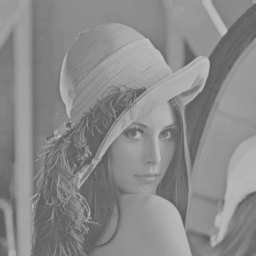

In [42]:
cv2_imshow(lcimg)

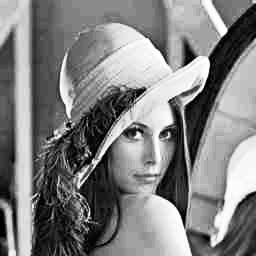

In [43]:
cv2_imshow(nstreched)

In [45]:
ir_max = lcimg.max()
ir_min = lcimg.min() 
print(ir_max,ir_min)
is_max = nstreched.max()
is_min = nstreched.min() 
print(is_max,is_min)

206 78
255.0 0.007781982421875


In [46]:
def hist_plot(img):
     
    # empty list to store the count
    # of each intensity value
    count =[]
     
    # empty list to store intensity
    # value
    r = []
     
    # loop to traverse each intensity
    # value
    for k in range(0, 256):
        r.append(k)
        count1 = 0
         
        # loops to traverse each pixel in
        # the image
        for i in range(m):
            for j in range(n):
                if int(img[i, j])== k:
                    count1+= 1
        count.append(count1)
         
    return (r, count)
 

Text(0.5, 1.0, 'Histogram of the original image')

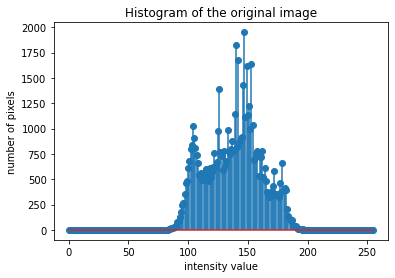

In [47]:
r1, count1 = hist_plot(lcimg)
 
# plotting the histogram
plt.stem(r1, count1)
plt.xlabel('intensity value')
plt.ylabel('number of pixels')
plt.title('Histogram of the original image')

Text(0.5, 1.0, 'Histogram of the stretched image')

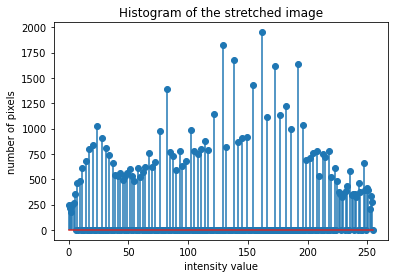

In [48]:
r1, count1 = hist_plot(nstreched)
 
# plotting the histogram
plt.stem(r1, count1)
plt.xlabel('intensity value')
plt.ylabel('number of pixels')
plt.title('Histogram of the stretched image')